In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic=sns.load_dataset('titanic')

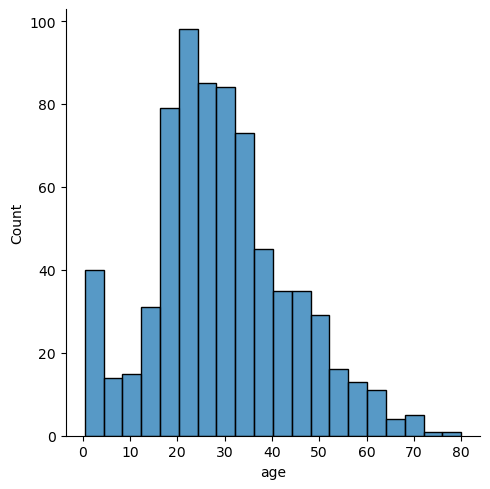

In [3]:
sns.displot(titanic['age'])

In [4]:
n_sample=1000
n_ratio=0.9
n_class0=int(n_sample*n_ratio)
n_class1=n_sample-n_class0

In [5]:
n_class0,n_class1

(900, 100)

In [6]:

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class0),
    'target':[0]*n_class0
})

# Generate synthetic data for class 1
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class1),
    'target':[1]*n_class1
})


In [7]:
class_0,class_1

(     feature_1  feature_2  target
 0    -0.628355   1.332593       0
 1    -0.862543   0.896096       0
 2    -0.023774   0.488657       0
 3     0.918144   1.160017       0
 4    -0.485706  -0.911983       0
 ..         ...        ...     ...
 895   0.811722   0.975463       0
 896   1.356045   0.110552       0
 897  -1.015318  -0.070092       0
 898  -2.605594   1.011007       0
 899  -0.917375  -0.260360       0
 
 [900 rows x 3 columns],
     feature_1  feature_2  target
 0    0.674199   4.219994       1
 1    0.138823   0.936249       1
 2    2.027135   2.410553       1
 3    2.093057   0.460345       1
 4    1.117665   2.342779       1
 ..        ...        ...     ...
 95   3.381698   1.782939       1
 96   0.746427   1.275381       1
 97   3.370451   2.239943       1
 98   0.881332   0.930753       1
 99   1.042997   3.285740       1
 
 [100 rows x 3 columns])

In [8]:
class_0['target'].value_counts()

target
0    900
Name: count, dtype: int64

In [9]:
class_1['target'].value_counts()

target
1    100
Name: count, dtype: int64

In [10]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [11]:
df.head()

,feature_1,feature_2,target
0,-0.628355,1.332593,0
1,-0.862543,0.896096,0
2,-0.023774,0.488657,0
3,0.918144,1.160017,0
4,-0.485706,-0.911983,0


In [12]:
df.shape

(1000, 3)

upsampling

In [14]:
 df_minority=df[df['target']==1]
 df_majority=df[df['target']==0]

In [15]:
df_minority.head()

,feature_1,feature_2,target
900,0.674199,4.219994,1
901,0.138823,0.936249,1
902,2.027135,2.410553,1
903,2.093057,0.460345,1
904,1.117665,2.342779,1


In [16]:
from sklearn.utils import resample

In [17]:
df_minority_upsample=resample( df_minority,
replace=True,
n_samples=len( df_majority),
random_state=42)

In [18]:
df_minority_upsample.head()

,feature_1,feature_2,target
951,2.010327,1.674447,1
992,1.837469,2.524894,1
914,0.700611,1.255863,1
971,1.251749,0.771352,1
960,2.076864,1.501228,1


In [19]:
df_minority_upsample.shape

(900, 3)

In [20]:
df_balanced=pd.concat([df_minority_upsample,df_majority])

In [21]:
df_balanced.head()

,feature_1,feature_2,target
951,2.010327,1.674447,1
992,1.837469,2.524894,1
914,0.700611,1.255863,1
971,1.251749,0.771352,1
960,2.076864,1.501228,1


In [22]:
df_balanced.head()


,feature_1,feature_2,target
951,2.010327,1.674447,1
992,1.837469,2.524894,1
914,0.700611,1.255863,1
971,1.251749,0.771352,1
960,2.076864,1.501228,1


downsampling

In [45]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class0),
    'target':[0]*n_class0
})

# Generate synthetic data for class 1
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class1),
    'target':[1]*n_class1
})


In [47]:
 df_minority=df[df['target']==1]
 df_majority=df[df['target']==0]

In [50]:
df_majority_downsample=resample( df_majority,
replace=False,
n_samples=len( df_minority),
random_state=42)

In [58]:
balanced_dataset=pd.concat([df_majority_downsample, df_minority])

In [63]:
balanced_dataset.shape

(200, 3)

In [66]:
balanced_dataset.head()

,feature_1,feature_2,target
70,-1.162187,1.061347,0
827,1.134792,0.054962,0
231,0.616890,-0.297194,0
588,0.254422,1.504230,0
39,1.006231,-1.473226,0


In [68]:
balanced_dataset.value_counts()

feature_1  feature_2  target
-2.781525  -0.212315  0         1
 1.428630   1.656281  1         1
 1.187532   2.186708  1         1
 1.206669   2.705398  1         1
 1.225144   3.110779  1         1
                               ..
 0.010278  -0.004856  0         1
 0.030443   1.508687  0         1
 0.046234  -0.264166  0         1
 0.047330  -1.802720  0         1
 4.446618   2.709926  1         1
Name: count, Length: 200, dtype: int64

In [74]:
balanced_dataset['feature_1'].value_counts()

feature_1
-1.162187    1
 1.867964    1
 2.331822    1
 4.347622    1
 0.888610    1
            ..
 1.083148    1
-1.216849    1
 0.030443    1
-0.987106    1
 1.042997    1
Name: count, Length: 200, dtype: int64

In [76]:
balanced_dataset['feature_1'].shape

(200,)

smote

In [78]:
from sklearn.datasets  import make_classification

In [158]:
#x is  the independent and y is dependent
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=2, weights=[0,0.95],n_redundant=0)

In [160]:
x

array([[ 0.17629743, -0.53873578],
       [-0.22565698, -0.22688467],
       [ 1.18477316, -1.13238804],
       ...,
       [ 2.28248419,  2.14528815],
       [ 2.09842235, -1.67107372],
       [ 0.44160211, -0.6747342 ]])

In [162]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [164]:
df1=pd.DataFrame(x,columns=["f1","f2"])

In [166]:
df2=pd.DataFrame(y,columns=["target"])

In [178]:
final_dataframe=pd.concat([df1,df2],axis=1)
final_dataframe

,f1,f2,target
0,0.176297,-0.538736,1
1,-0.225657,-0.226885,1
2,1.184773,-1.132388,1
3,1.046085,0.731651,1
4,1.889036,-1.569092,1
...,...,...,...
995,0.231546,-0.546893,1
996,1.836704,-1.502047,1
997,2.282484,2.145288,1
998,2.098422,-1.671074,1


In [180]:
final_dataframe['target'].value_counts()

target
1    973
0     27
Name: count, dtype: int64

In [182]:
final_dataframe['f1'].value_counts()

f1
 0.176297    1
-0.171731    1
 0.946356    1
-0.022897    1
 2.556857    1
            ..
 0.835747    1
 1.076151    1
 2.749877    1
 1.428315    1
 0.441602    1
Name: count, Length: 1000, dtype: int64

In [188]:
final_dataframe['f2'].value_counts()

f2
-0.538736    1
-0.349863    1
-0.946607    1
-0.362576    1
 1.591633    1
            ..
 0.635138    1
 1.102761    1
 2.377142    1
-1.276342    1
-0.674734    1
Name: count, Length: 1000, dtype: int64

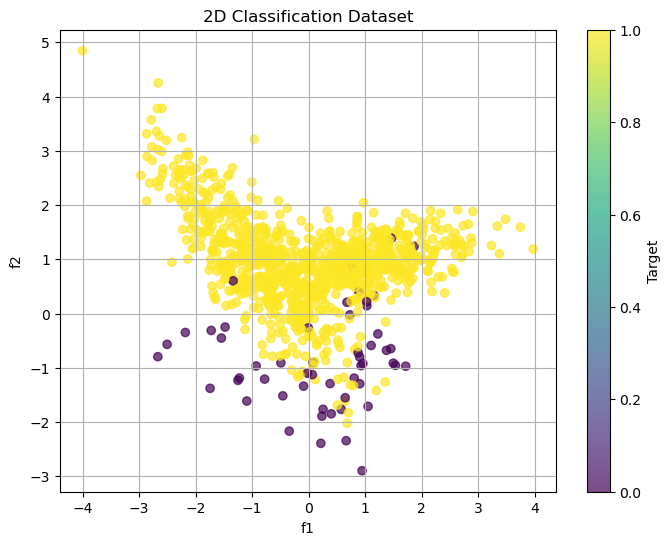

In [220]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

x, y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=2, 
                           weights=[0.05, 0.95], n_redundant=0)

df1 = pd.DataFrame(x, columns=["f1", "f2"])
df2 = pd.DataFrame(y, columns=["target"])
final_dataframe = pd.concat([df1, df2], axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(final_dataframe['f1'], final_dataframe['f2'], c=final_dataframe['target'], 
            cmap='viridis', alpha=0.7)
plt.title("2D Classification Dataset")
plt.xlabel("f1")
plt.ylabel("f2")
plt.colorbar(label="Target")
plt.grid(True)
plt.show()


In [253]:
final_dataframe['target'].value_counts()

target
1    946
0     54
Name: count, dtype: int64

SMOTE TECHNIQUE

In [222]:
!pip install imblearn

In [223]:
from imblearn.over_sampling import SMOTE

In [224]:
oversample=SMOTE()

In [232]:
x,y=oversample.fit_resample(final_dataframe[['f1','f2']], final_dataframe['target'],)

In [241]:
pd.DataFrame(x).shape

(1892, 2)

In [245]:
len(y[y==1])

946

In [247]:
len(y[y==0])

946

In [271]:
df1 = pd.DataFrame(x, columns=["f1","f2"])
df2 = pd.DataFrame(y, columns=["target"])
oversample=pd.concat([df1,df2],axis=1)


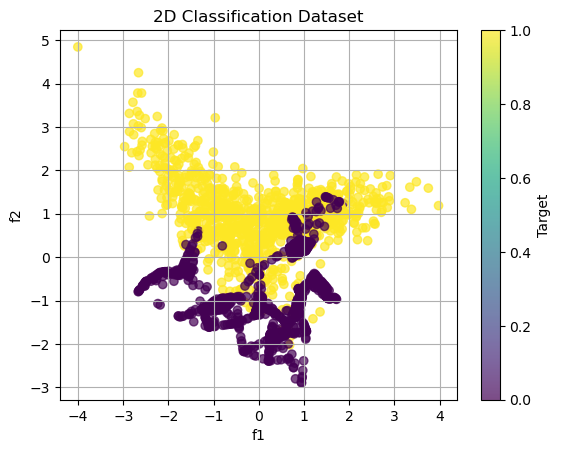

In [275]:
plt.scatter(oversample['f1'], oversample['f2'], c=oversample['target'], 
            cmap='viridis', alpha=0.7)
plt.title("2D Classification Dataset")
plt.xlabel("f1")
plt.ylabel("f2")
plt.colorbar(label="Target")
plt.grid(True)
plt.show()


In [279]:
oversample['target'].value_counts()

target
1    946
0    946
Name: count, dtype: int64